# Second Semester (2021 – 2022): ICS 483 - Computer Vision

## Assignment 01 (Due: February 09, 2022)
In this assignment, we will go through image representation and filtering using python.

One of the aims of this assignment is to apply the topics that have been covered in the class. In addition, to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

### Enter Student Details
##### Name: "Abdulrhman Aljaber" , Student ID: "201650400"

### Task 0: Reprenseting Figures

In [15]:
#Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
import cv2
import numpy as np
# This code is to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In this part, you will load some images and do some operations on them. At the end of this part, please create a new python file `imageMain.py` and copy all of your implemented functions in that file to use them in your future assignments and project. In your submission, include this updated notebook, a PDF of this notebook, and imageMain.py.

## Question 1 (5 points)
Implement the readImage method and call the displayImage method implemented below. We will use these two methods through the rest of the notebook to visualize our work.

In [79]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.
image_path = './image1.jpg'

def displayImage(img, target = None):
    # Show image
    if target == 'RGB': 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def readImage(imagePath):
    return cv2.imread(imagePath)
    

In [78]:
# import numpy as np
# image = readImage('image1.jpg')
# image2 = readImage('image2.jpg')
# displayImage(image)
# displayImage(image2)




## Question 2 (5 points)
Implement the convertColor method and convert the image into grayscale and binary.

In [7]:
def convertColor(image, srcColor, targetColor):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if(targetColor == 'gray'):
        return gray 
    
    else:
        ret, BW = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
        ret, BWI = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
        color = {'grey':gray, 'BW':BWI, 'BWI':BWI}
        return BW,BWI

    

In [8]:
# convert image from RGB to greyscale
gray_img = convertColor(image, 'RGB', 'gray')
print("Below is the image with only one channel (gray) channel.")
displayImage(gray_img)

# convert image from RGB to binary
bw, bwi = convertColor(image, 'RGB', 'BW') # BWI: binary inverse
print("Below is the image with Black and white.")
displayImage(bw)
print("Below is the image with Black and white inversed.")
displayImage(bwi)

NameError: name 'image' is not defined

## Question 3 (10 points)
Implement the `rgb_exclusion()`, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. 

In [8]:
def rgb_exclusion(image, channelToExclude):
    img = image.copy() # image is not writeable, we can also cast the image while reading to np.array(image.open('path'))
    if channelToExclude == 'R':
        img[:,:,0] = 0
    elif channelToExclude == 'G':
        img[:,:,1] = 0
    elif channelToExclude == 'B':
        img[:,:,2] = 0
    return img

Below is the image without the red channel.


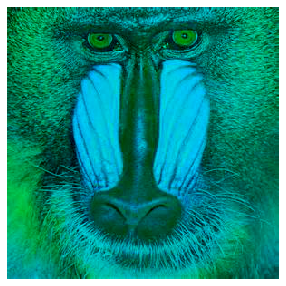

Below is the image without the green channel.


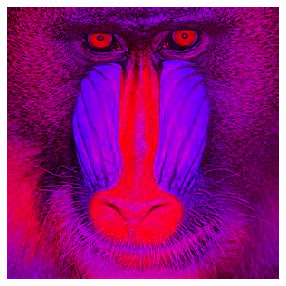

Below is the image without the blue channel.


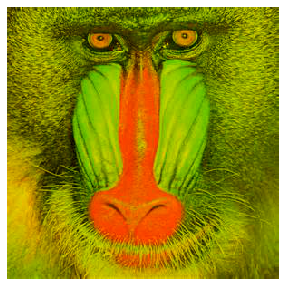

In [9]:
without_red = rgb_exclusion(image, 'R')
without_blue = rgb_exclusion(image, 'B')
without_green = rgb_exclusion(image, 'G')

print("Below is the image without the red channel.")
displayImage(without_red)

print("Below is the image without the green channel.")
displayImage(without_green)

print("Below is the image without the blue channel.")
displayImage(without_blue)

## Question 4 (10 points)
Implement the hsv_decomposition, in which the input image is decomposed into the three channels: H, S and V and return the values for the specified channel. 

In [10]:
def hsv_decomposition(image, channelToExclude):
    #First covert the image from RGB to HSV
    img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)/255
    # img = image.copy() # image is not writeable, we can also cast the image while reading to np.array(image.open('path'))
    decomposed = np.zeros(image.shape)
    if channelToExclude == 'H':
        decomposed[:,:,0] = img[:,:,0]
        return decomposed
    elif channelToExclude == 'S':
        decomposed[:,:,1] = img[:,:,1]
        return decomposed
    elif channelToExclude == 'V':
        decomposed[:,:,2] = img[:,:,2]
        return decomposed
    print('invalid channelToExclude input')

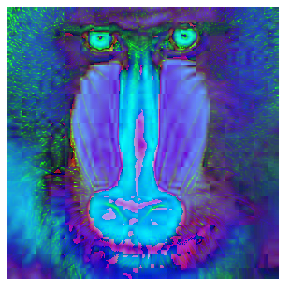

In [11]:
img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
displayImage(img_hsv)

Below is the image with only the H channel.


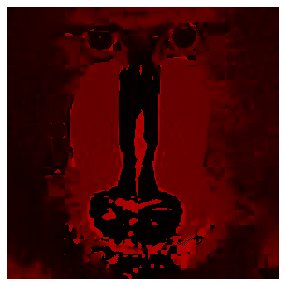

Below is the image with only the S channel.


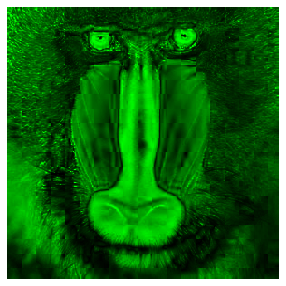

Below is the image with only the V channel.


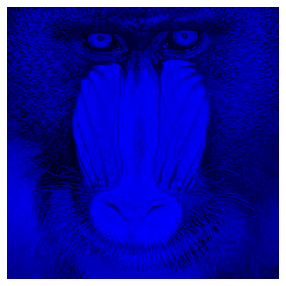

In [12]:
image_h = hsv_decomposition(image, 'H')
image_s = hsv_decomposition(image, 'S')
image_v = hsv_decomposition(image, 'V')

print("Below is the image with only the H channel.")
displayImage(image_h)

print("Below is the image with only the S channel.")
displayImage(image_s)

print("Below is the image with only the V channel.")
displayImage(image_v)

## Question 5 (5 points)
Explain in 2-3 sentences what happens to an image when you take away the H and S channels.
### Answer:
when we took only Hue the image end up to red, while when we took only S the image showed on green  

## Question 6 (20 points)
In this section, you will ransform the image into the frequency domain. In addition, you will compute and display the real, imaginary, magnitude and phase components of the transformed image.  

In [69]:
def fourier_tranformer(image):
    image = np.sqrt(image)/255.0
    gx = cv2.Sobel(np.float32(image), cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(np.float32(image), cv2.CV_32F, 0, 1)

    mag, ang = cv2.cartToPolar(gx, gy)

    return mag, ang, gx, gy
    return real, imaginary, magnitude, phase



In [14]:
def fourier_tranformer(image):
    image = convertColor(image, 'RGB', 'gray')
    imaginary = np.fft.fft2(image)
    
    imag_real = np.fft.fftshift(imaginary)
    magnitude = 20*np.log(np.abs(imag_real))
    phase = 20*np.angle(imag_real)
    return image, imaginary, magnitude, phase



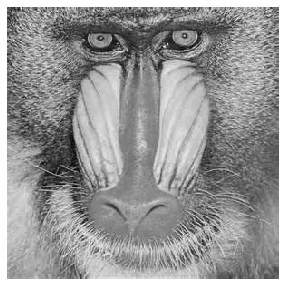

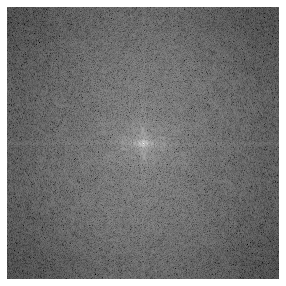

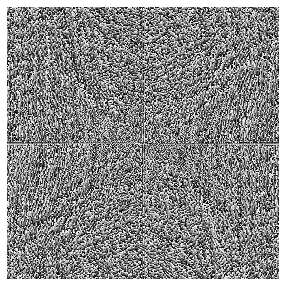

In [15]:
real, imaginary, magnitude, phase = fourier_tranformer(image)

displayImage(real)
# displayImage(imaginary)
displayImage(magnitude)
displayImage(phase)


## Question 7 (10 points)
(a) Add salt and pepper noise to the image. Generate two images of the input image by making the gray values of 5% and 10% of the image pixels randomly 0 (black) or 255 (white).


In [28]:
def add_saltpepper_noise(image,prob):
    
    img= image.copy()
    black = np.array([0, 0, 0], dtype='uint8')
    white = np.array([255, 255, 255], dtype='uint8')

    probs = np.random.random(image.shape[:2])
    img[probs < (prob / 2)] = black
    img[probs > 1 - (prob / 2)] = white
    return img


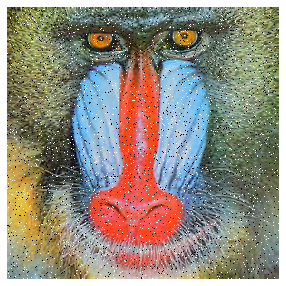

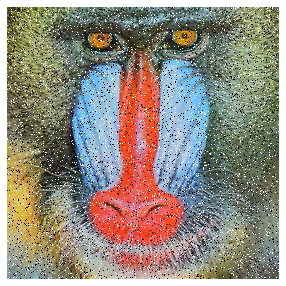

In [27]:
image_saltNoise_5 = add_saltpepper_noise(image,0.05)
displayImage(image_saltNoise_5)

image_saltNoise_10 = add_saltpepper_noise(image,0.1)
displayImage(image_saltNoise_10)

(b) Add Gaussian noise to the image. Use Gaussian noise with segma = 2 and 5 to get two noisy images.


In [38]:
def add_gaussian_noise(image, sigma):

    img = image.copy()/255.0
    img += np.random.normal(0, sigma, image.shape)
    return img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


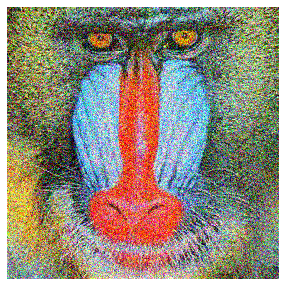

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


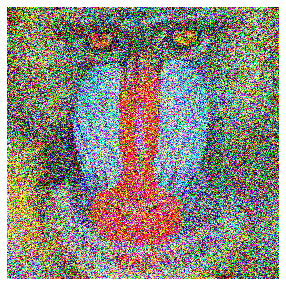

In [41]:
image_gaussianNoise_2 = add_gaussian_noise(image,0.2)
displayImage(image_gaussianNoise_2)

image_gaussianNoise_5 = add_gaussian_noise(image,0.5)
displayImage(image_gaussianNoise_5)


## Question 8 (15 points)
Apply average, Gaussian, and median filters of 3 x 3 and 5 x 5 sizes to the images of question 7 (a) and 7 (b) and analyze the resul

In [42]:
def add_filters(image, filterType,filterSzie):
    filters = {'gaussian':cv2.GaussianBlur(image,(filterSzie,filterSzie),0),
                'median':cv2.medianBlur(image,filterSzie),
                'average':cv2.blur(image,(filterSzie,filterSzie)),
    }
    return filters.get(filterType)



Below is the image with a 3*3 Gaussian filter.


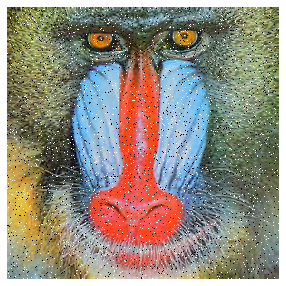

Below is the image with a 5*5 Gaussian  filter.


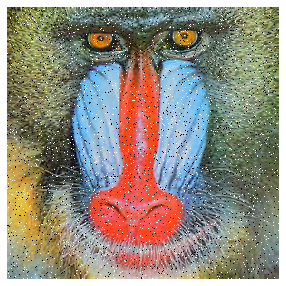

Below is the image with a 3*3 median filter.


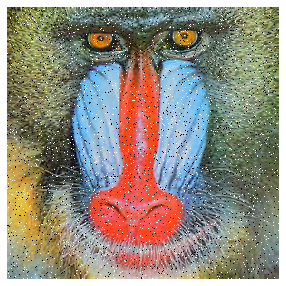

Below is the image with a 5*5 median filter.


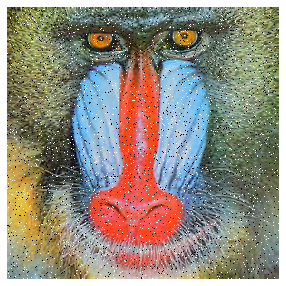

Below is the image with a 3*3 average filter.


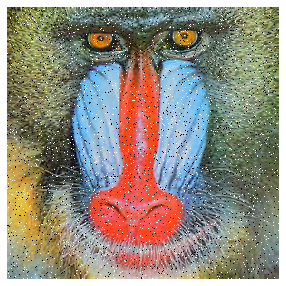

Below is the image with a 5*5 average filter.


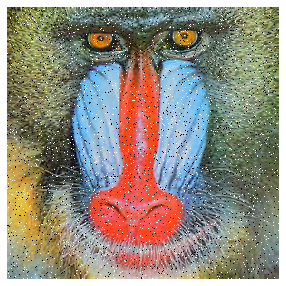

In [45]:
image_gaussianFilter_3 = add_filters(image,'gaussian',3)
print("Below is the image with a 3*3 Gaussian filter.")
displayImage(image_saltNoise_5)


image_gaussianFilter_5 = add_filters(image,'gaussian',5)
print("Below is the image with a 5*5 Gaussian  filter.")
displayImage(image_saltNoise_5)


image_medianFilter_3 = add_filters(image,'median',3)
print("Below is the image with a 3*3 median filter.")
displayImage(image_saltNoise_5)


image_MedianFilter_3 = add_filters(image,'median',5)
print("Below is the image with a 5*5 median filter.")
displayImage(image_saltNoise_5)


image_AverageFilter_3 = add_filters(image,'average',3)
print("Below is the image with a 3*3 average filter.")
displayImage(image_saltNoise_5)


image_AverageFilter_3 = add_filters(image,'average',5)
print("Below is the image with a 5*5 average filter.")
displayImage(image_saltNoise_5)


## Question 9 (20 points)
Enhance image2 to increase the brightness of bright regions and increase the darkness of other regions, then display the enhanced image.

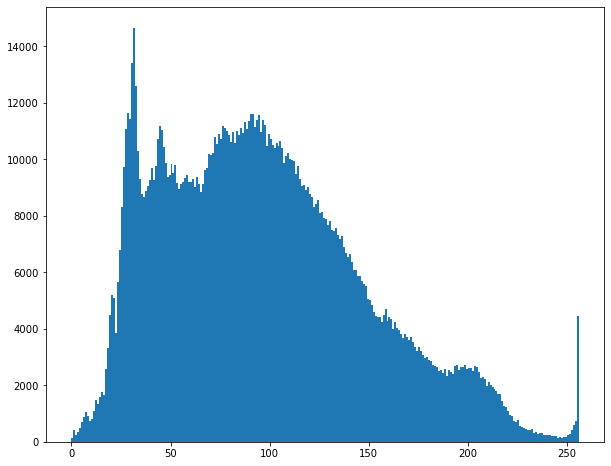

In [82]:
plt.hist(image2.ravel(),256,[0,256]); plt.show()

# Assignment 2
## Question 1 (20 points)
Apply Sobel operators to find the edges of the “hand.jpg “ image. 

1. Find and show the horizontal and vertical gradients of the image
2. Find and show the gradient magnitude
3. Find and show the gradient directions
4. Analyze the results.


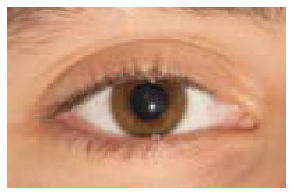

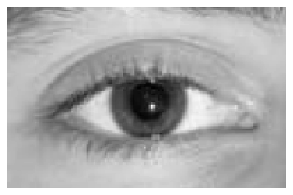

In [135]:
def Sobel(imagePath):
    eyesImg = readImage(imagePath)
    grayEye = cv2.cvtColor(eyesImg, cv2.COLOR_BGR2GRAY)
    print('RGB Image')
    displayImage(eyesImg,'RGB')
    print("Gray Image")
    displayImage(grayEye)
    k =3
    gray_blur = cv2.bilateralFilter(grayEye, k, k * 2, k / 2) 

    fx = np.array([[ -1, 0, 1], 
                        [ -2, 0, 2], 
                        [ -1, 0, 1]])
    fy = np.array([[ -1, -2, -1], 
                        [  0,  0,  0], 
                        [  1,  2,  1]])
                        
    Dx = cv2.filter2D(gray_blur, cv2.CV_32F, fx)  
    Dy = cv2.filter2D(gray_blur, cv2.CV_32F, fy)

    print('Drivative of x')
    displayImage(Dx)
    print('Drivative of y')
    displayImage(Dy)

    magnitude = cv2.magnitude(Dx, Dy)
    directions = cv2.phase(Dx, Dy, angleInDegrees=True)
    directions = directions / 2. 
    hsv = np.zeros_like(eyesImg)
    hsv[..., 0] = directions 
    hsv[..., 1] = 255 
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX) 
    colorspace = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    print('gradient magnitude')
    displayImage(magnitude)
    print('gradient directions')
    displayImage(directions)
    print('gradient magnitude with a colored edges')
    displayImage(colorspace,'RGB')


RGB Image


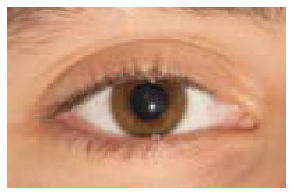

Gray Image


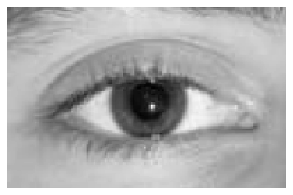

Drivative of x


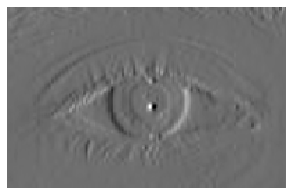

Drivative of y


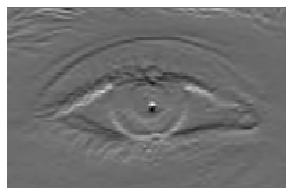

gradient magnitude


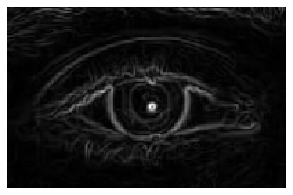

gradient directions


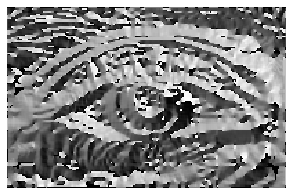

gradient magnitude with a colored edges


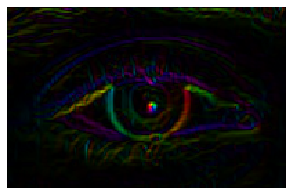

In [136]:
Sobel('eye01.PNG')

as we can see above, we were able to find the virtical edges by takking  the Derivative of x and the horizental edge by takign the Derivative of y. Moreover we found the magnitude by applying the the following formula sqrt(dx**2+dy**2) and we displayed it with and without colorspace, and we used for HSV colors to do that hence it works better with edges. Finally we obtained the dicrctions by applying the arctan formula.  

## Question 2 (20 points)
Apply Canny detector to “hand.jpg” image and compare the results with Sobel operator.

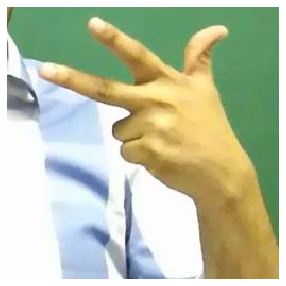

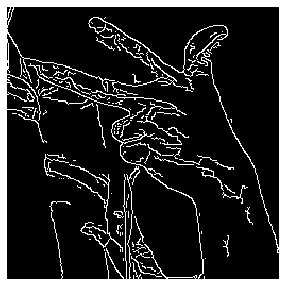

In [130]:
def Canny(imagepath):
    handimg = readImage(imagepath)
    grayhand = cv2.cvtColor(handimg, cv2.COLOR_BGR2GRAY)
    p1 = 71
    p2 = p1*0.4
    edges = cv2.Canny(image=grayhand, threshold1=p1, threshold2=p2) # Canny Edge Detection
    displayImage(handimg,'RGB')
    displayImage(edges)

Canny('hand.jpg')

## Question 3 (30 points)
Apply Hough transform to detect the center and radius of all eye irises found in 'eyes.zip' images. You need also to display and draw the detected irises on the original images.

In [128]:
    def eyeIrisDetector(imagePath):
        eyesImg = readImage(imagePath)
        grayEye = cv2.cvtColor(eyesImg, cv2.COLOR_BGR2GRAY)
        if 'eye01.png'== imagePath:
            p1 = 72
            p2 = p1*0.4
        elif 'eye02.png'== imagePath:
            p1 = 66
            p2 = p1*0.4
        else:
            p1 = 71
            p2 = p1*0.4
        cimg = np.copy(eyesImg)
        circles = cv2.HoughCircles(grayEye, cv2.HOUGH_GRADIENT, 1, cimg.shape[0]/64, param1=p1, param2=p2, minRadius=25, maxRadius=50)


        if circles is not None:
            cir_len = circles.shape[1] 
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                # Draw the outer circle
                cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Draw the center of the circle
                cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        else:
            cir_len = 0 
            
        edges = cv2.Canny(grayEye, p1, p2)
        displayImage(edges)
        displayImage(cimg,'RGB')
        


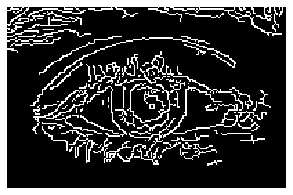

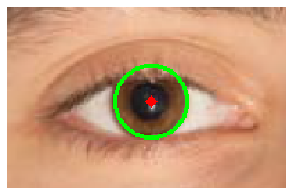

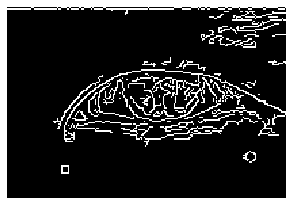

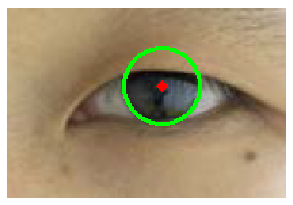

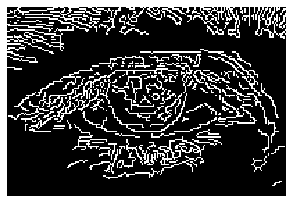

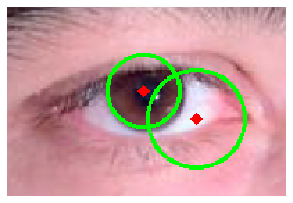

In [129]:

    eyeIrisDetector('eye01.png')
    eyeIrisDetector('eye02.png')
    eyeIrisDetector('eye03.png')